In [1]:
from neuron import h
import pandas as pd
import numpy as np
from templates.active_model_synapse_input import *

mechanisms_path = 'mechanisms'  # need to compile the folder first
geometry_file = 'geom_standard.csv'
tstop = 20.  # ms
dt = 0.025  # ms. does not allow change

h.nrn_load_dll(os.path.join(mechanisms_path,'nrnmech.dll'))  # running this line more than once might crash the kernel
#h.nrn_load_dll(os.path.join(mechanisms_path,'x86_64/.libs/libnrnmech.so'))  # use this line instead in Linux
geo_standard = pd.read_csv(geometry_file,index_col='id')
h.tstop = tstop
h.dt = dt

In [2]:
x = np.zeros(96)
y = np.linspace(-1900,1900,96)
z = np.zeros(96)
elec_pos = pos = np.column_stack((x,y,z))

In [3]:
# prior_min = np.array([0,-2000,0,-1,0])
# prior_max = np.array([200,2000,np.pi,1,np.pi])
# nsamples = 1
# loc_param = np.random.uniform(prior_min,prior_max,size=(nsamples,5))
# loc_param

In [4]:
loc_param = [80,350,3.0,0.9,1.27]  # example position
# geo_param = [-1,-1,-1]  # choose trunk length [-1,600], bounds([3,12],[20,800],[0.2,1.0],[0.2,1.0],[0.2,1.0],[100,300])
# biophys = [-1,-1,-1,-1,-1]
sim = Simulation(geo_standard,elec_pos,loc_param,gmax=0.0025,scale=10000.)  # gmax 0.001 -0.012

In [5]:
sec_list = sim.cells[0].all
dend_v = Recorder([sec_list[5](0.1),sec_list[5](0.5),sec_list[5](0.9),sec_list[6](0.5)])

In [6]:
sim.run()
lfp = sim.get_lfp().T
t = sim.t()

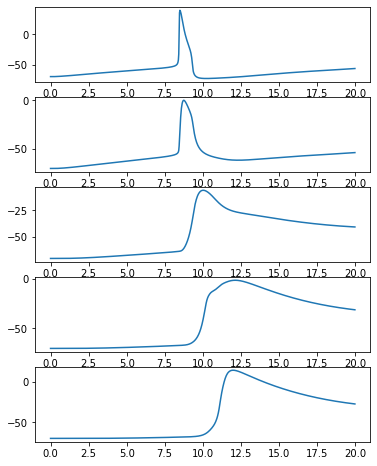

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

v_dend = dend_v.as_numpy()
plt.figure(figsize=(6,8))
plt.subplot(5,1,1)
plt.plot(t,sim.cells[0].v())
for i in range(v_dend.shape[0]):
    plt.subplot(5,1,i+2)
    plt.plot(t,v_dend[i,:])
plt.show()

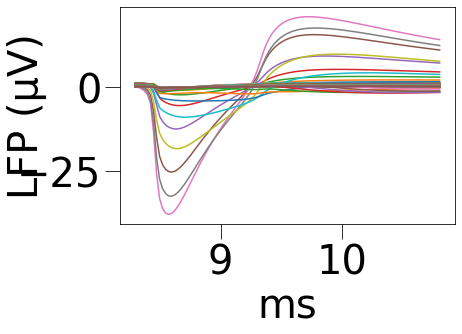

In [19]:
from utils.plot_results import plot_LFP_traces,plot_LFP_heatmap
%matplotlib inline

delay = 8.3
window = [delay,delay+2.51]
# window = [5.,15.01]
idx = (t>=window[0]) & (t<=window[1])  # time index
fig,ax = plot_LFP_traces(t[idx],lfp[idx,:])

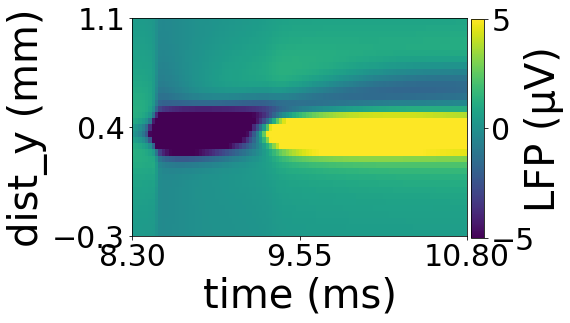

In [13]:
e_idx = slice(40,-20)  # electrodes index
fig,ax = plot_LFP_heatmap(t[idx],pos[e_idx,1],lfp[idx,e_idx],vlim=[-5,5])
# set narrower "vlim" can help see more subtle difference in voltage